In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from datetime import *
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/store-sales-time-series-forecasting.zip'

Archive:  /content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [ ]:
transactions = pd.read_csv('transactions.csv')

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [1]:
transactions.head()

NameError: ignored

In [ ]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [ ]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


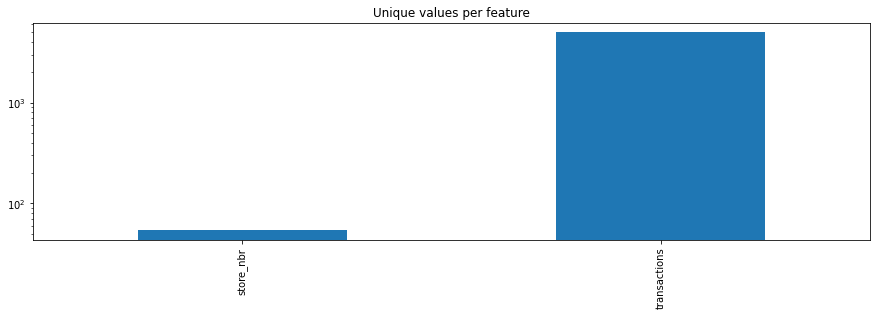

In [ ]:
unique_values = transactions.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")

Text(0, 0.5, 'Sample Number')

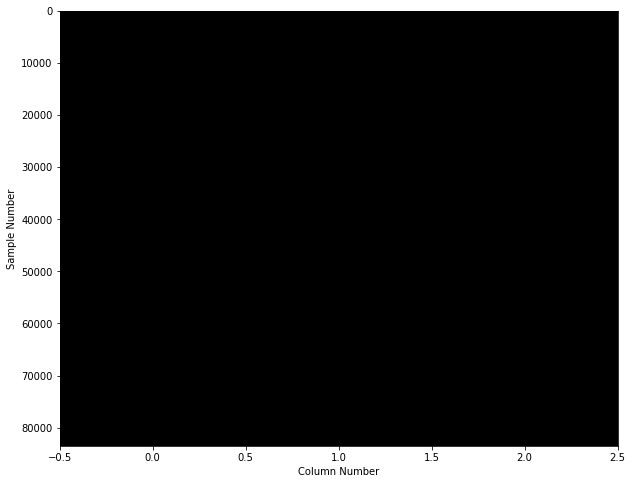

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(transactions.isna(), aspect = "auto", interpolation = "nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d439b1710>,
      dtype=object)

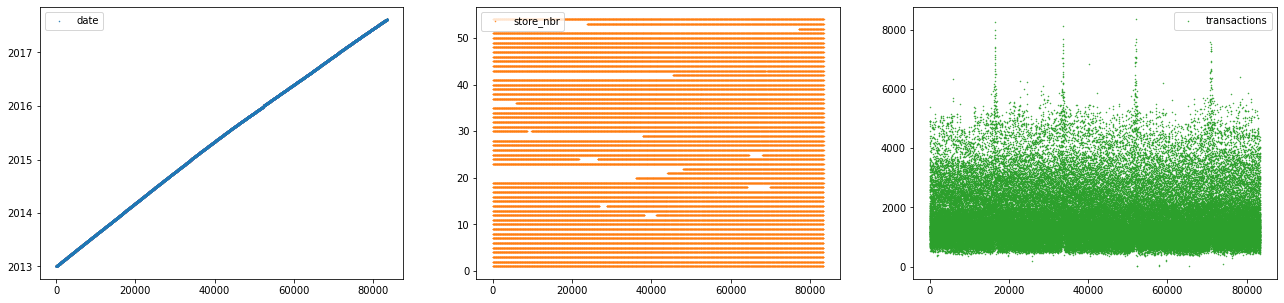

In [ ]:
transactions.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (30,5), markersize = 1)

In [ ]:
transactions_g = transactions.groupby(['date', 'store_nbr'])['transactions'].sum().reset_index()


In [ ]:
transactions.groupby(['date', 'store_nbr'])['transactions'].sum()

date        store_nbr
2013-01-01  25            770
2013-01-02  1            2111
            2            2358
            3            3487
            4            1922
                         ... 
2017-08-15  50           2804
            51           1573
            52           2255
            53            932
            54            802
Name: transactions, Length: 83488, dtype: int64

In [ ]:
transactions_g = transactions_g.set_index('date')


In [ ]:
transactions_g.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-02', '2013-01-02',
               '2013-01-02', '2013-01-02', '2013-01-02', '2013-01-02',
               '2013-01-02', '2013-01-02',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=83488, freq=None)

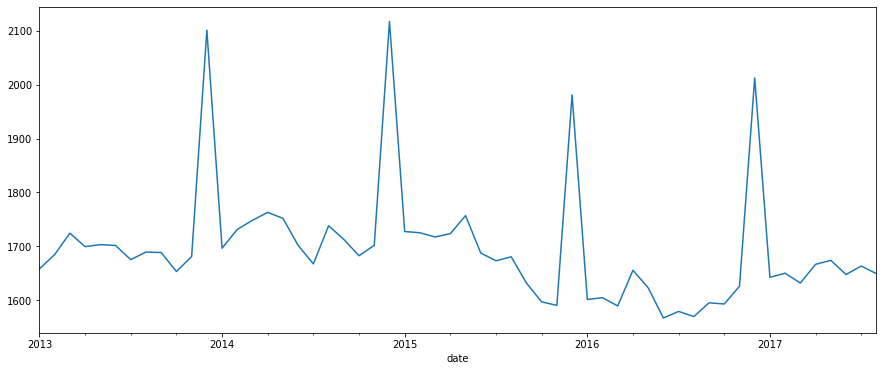

In [ ]:
y = transactions_g['transactions'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
y['2017':].plot(figsize=(15, 6))


we can see a spike in the transactions 

We can see that near the end of the year (christmes) the number of transactions is rising up. ----> **maybe we should add a boolean feature to mark if the date is X days befor christems**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


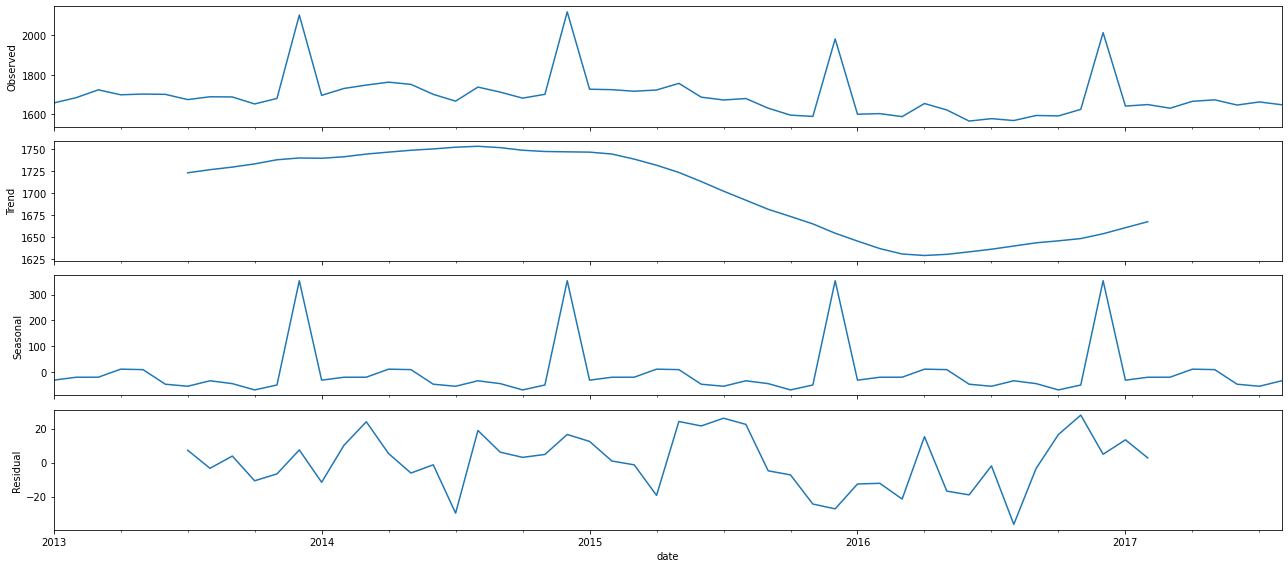

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

S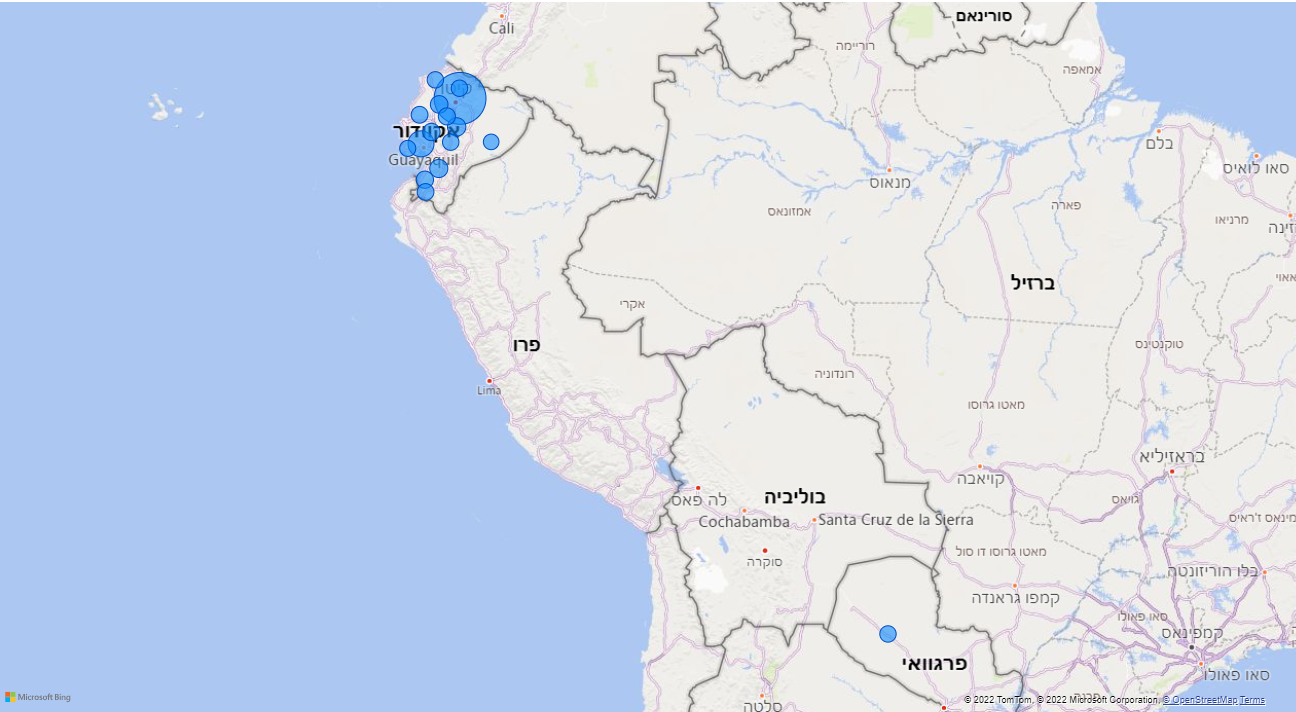

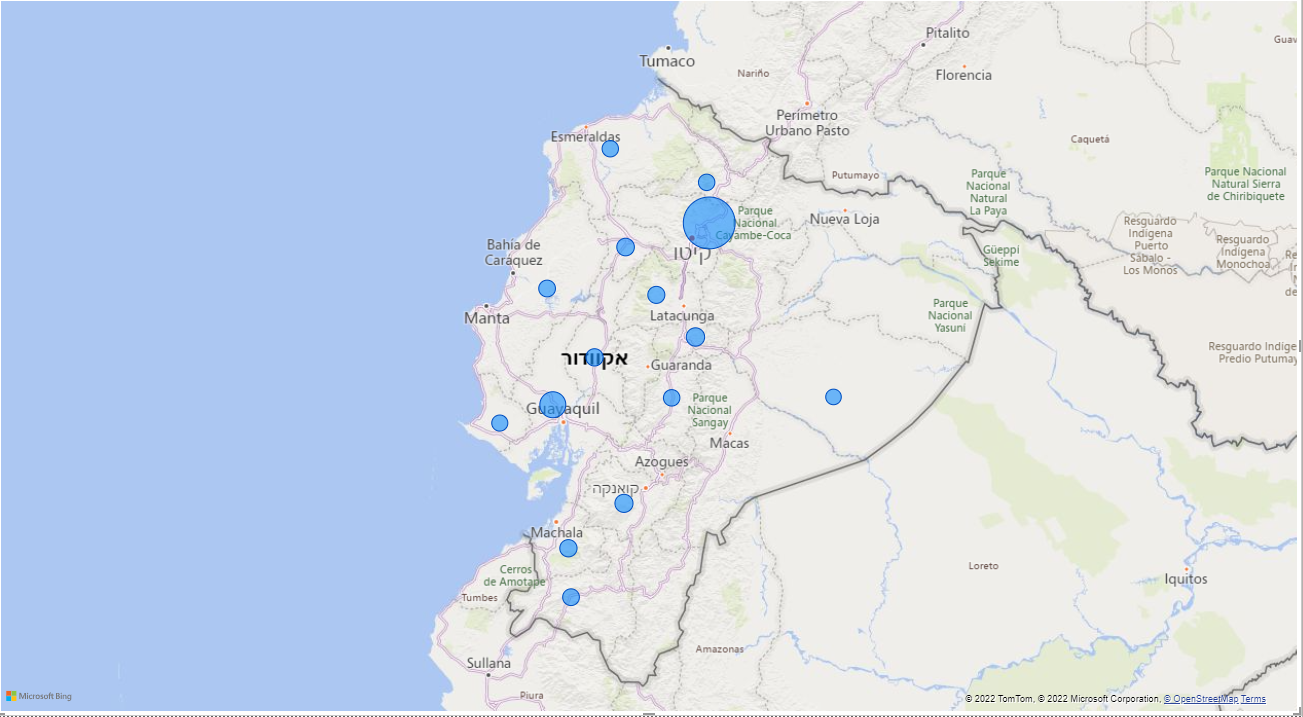